In [1]:
import scanpy as sc

import matplotlib.pyplot as plt
import sys; sys.path.append("../../../utility_scripts/")
from visium_utils import *
from pl_cooccurrence import *

from skimage import io
from MILWRM.MxIF import *

In [2]:
sc.set_figure_params(transparent=True, dpi_save=400)
sns.set_style("white")
sc.settings.figdir = "immune_exclusion/"

---

In [3]:
sample_key = pd.read_csv("../../resources/visium_sample_key.csv", index_col=0)

sample_key.ws_adata = sample_key.ws_adata.fillna("")
sample_key.TMA = sample_key.TMA.fillna("F")

In [4]:
rename_dict = {
    "FIB2_VUMCrefNMF30":"FIB2",
    "FIB3_VUMCrefNMF30":"FIB3",
    "MYE1_VUMCrefNMF30":"MYE1",
    "MYE2_VUMCrefNMF30":"MYE2",
    "MYE3_VUMCrefNMF30":"MYE3",
    "MYE4_VUMCrefNMF30":"MYE4",
    "MYE5_VUMCrefNMF30":"MYE5",
    "TL1_VUMCrefNMF30":"TL1",
    "TL2_VUMCrefNMF30":"TL2",
    "TL3_VUMCrefNMF30":"TL3",
    "Immune Exclusion":"IES",  # rename IES
}

markers_thresh = [
    "IES",
    "DDR1",
    "TGFBI",
    "PAK4",
    "DPEP1",
    "FIB2",
    "FIB3",
    "MYE1",
    "MYE2",
    "MYE3",
    "MYE4",
    "MYE5",
    "TL1",
    "TL2",
    "TL3",
]

markers_thresh_dict = dict(zip(markers_thresh, [80] * len(markers_thresh)))

---

In [5]:
sample_key.patient_name.unique()

array(['SR00001', 'HTA11_01938', 'HTA11_07862', 'HTA11_10711', 'PAT71397',
       'PAT05785', 'PAT06439', 'PAT15211', 'PAT30884', 'PAT59600',
       'PAT59667', 'PAT71662', 'PAT73899', 'PAT74143', 'SG00003',
       'SG00004', 'HTA11_06134', 'HTA11_07663', 'HTA11_08622_A',
       'HTA11_08622_B', 'PAT00222', 'PAT01586', 'PAT01587', 'PAT33430',
       'PAT40364', 'PAT54273', 'PAT59460', 'PAT73458', 'SG00001',
       'SG00002'], dtype=object)


Starting SG00001
Detected 2 whole-slide sample(s) saved in datasets/SG00001_combined_ws.h5ad
Thresholding .obs column IES at 80
Thresholding gene DDR1 at 80
Thresholding gene TGFBI at 80
Thresholding gene PAK4 at 80
Thresholding gene DPEP1 at 80
Thresholding .obs column FIB2 at 80
Thresholding .obs column FIB3 at 80
Thresholding .obs column MYE1 at 80
Thresholding .obs column MYE2 at 80
Thresholding .obs column MYE3 at 80
Thresholding .obs column MYE4 at 80
Thresholding .obs column MYE5 at 80
Thresholding .obs column TL1 at 80
Thresholding .obs column TL2 at 80
Thresholding .obs column TL3 at 80
Failed on IES_thresh for clone 1 of SG00001
Failed on DDR1_thresh for clone 1 of SG00001
Failed on TGFBI_thresh for clone 1 of SG00001
Failed on PAK4_thresh for clone 1 of SG00001
Failed on DPEP1_thresh for clone 1 of SG00001
Failed on FIB2_thresh for clone 1 of SG00001
Failed on FIB3_thresh for clone 1 of SG00001
Failed on MYE1_thresh for clone 1 of SG00001
Failed on MYE2_thresh for clone 1 o

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

No 'regular' ST samples for SG00001
DONE.


Starting SG00002
Detected 2 whole-slide sample(s) saved in datasets/SG00002_combined_ws.h5ad
Thresholding .obs column IES at 80
Thresholding gene DDR1 at 80
Thresholding gene TGFBI at 80
Thresholding gene PAK4 at 80
Thresholding gene DPEP1 at 80
Not enough signal in DPEP1 to proceed; skipping.
Thresholding .obs column FIB2 at 80
Thresholding .obs column FIB3 at 80
Thresholding .obs column MYE1 at 80
Thresholding .obs column MYE2 at 80
Thresholding .obs column MYE3 at 80
Thresholding .obs column MYE4 at 80
Thresholding .obs column MYE5 at 80
Thresholding .obs column TL1 at 80
Thresholding .obs column TL2 at 80
Thresholding .obs column TL3 at 80
Failed on IES_thresh for clone 1 of SG00002
Failed on DDR1_thresh for clone 1 of SG00002
Failed on TGFBI_thresh for clone 1 of SG00002
Failed on PAK4_thresh for clone 1 of SG00002
Failed on FIB2_thresh for clone 1 of SG00002
Failed on FIB3_thresh for clone 1 of SG00002
Failed on MYE1_thresh for clone 1 

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

/home/cody/Dropbox (VU Basic Sciences)/fuzzy-lasagna/data/visium/../../../utility_scripts/pl_cooccurrence.py:194: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

No 'regular' ST samples for SG00002
DONE.


Starting SG00003
Detected 2 whole-slide sample(s) saved in datasets/SG00003_combined_ws.h5ad
Thresholding .obs column IES at 80
Thresholding gene DDR1 at 80
Thresholding gene TGFBI at 80
Thresholding gene PAK4 at 80
Thresholding gene DPEP1 at 80
Thresholding .obs column FIB2 at 80
Thresholding .obs column FIB3 at 80
Thresholding .obs column MYE1 at 80
Thresholding .obs column MYE2 at 80
Thresholding .obs column MYE3 at 80
Thresholding .obs column MYE4 at 80
Thresholding .obs column MYE5 at 80
Thresholding .obs column TL1 at 80
Thresholding .obs column TL2 at 80
Thresholding .obs column TL3 at 80
Failed on IES_thresh for clone 1 of SG00003
Failed on DDR1_thresh for clone 1 of SG00003
Failed on TGFBI_thresh for clone 1 of SG00003
Failed on PAK4_thresh for clone 1 of SG00003
Failed on DPEP1_thresh for clone 1 of SG00003
Failed on FIB2_thresh for clone 1 of SG00003
Failed on FIB3_thresh for clone 1 of SG00003
Failed on MYE1_thresh for clone 1 of 

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

No 'regular' ST samples for SG00003
DONE.


Starting SG00004
Detected 2 whole-slide sample(s) saved in datasets/SG00004_combined_ws.h5ad
Thresholding .obs column IES at 80
Thresholding gene DDR1 at 80
Thresholding gene TGFBI at 80
Thresholding gene PAK4 at 80
Thresholding gene DPEP1 at 80
Thresholding .obs column FIB2 at 80
Thresholding .obs column FIB3 at 80
Thresholding .obs column MYE1 at 80
Thresholding .obs column MYE2 at 80
Thresholding .obs column MYE3 at 80
Thresholding .obs column MYE4 at 80
Thresholding .obs column MYE5 at 80
Thresholding .obs column TL1 at 80
Thresholding .obs column TL2 at 80
Thresholding .obs column TL3 at 80
Failed on IES_thresh for clone 1 of SG00004
Failed on DDR1_thresh for clone 1 of SG00004
Failed on TGFBI_thresh for clone 1 of SG00004
Failed on PAK4_thresh for clone 1 of SG00004
Failed on DPEP1_thresh for clone 1 of SG00004
Failed on FIB2_thresh for clone 1 of SG00004
Failed on FIB3_thresh for clone 1 of SG00004
Failed on MYE1_thresh for clone 1 of 

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

No 'regular' ST samples for SG00004
DONE.



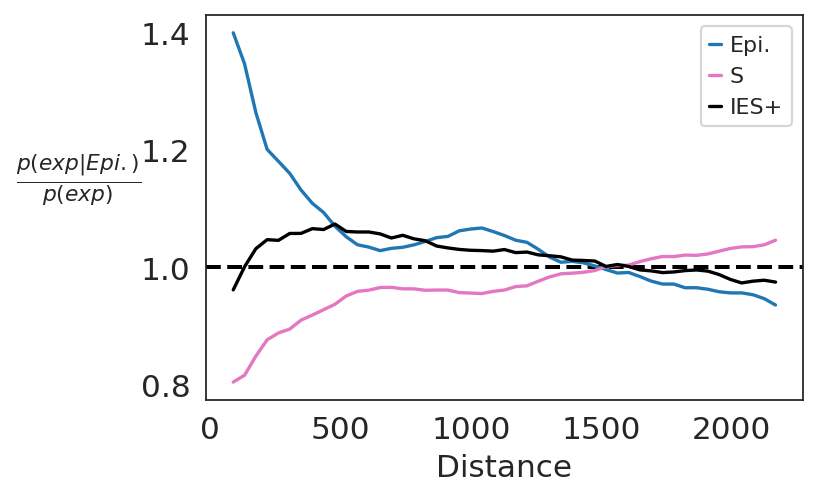

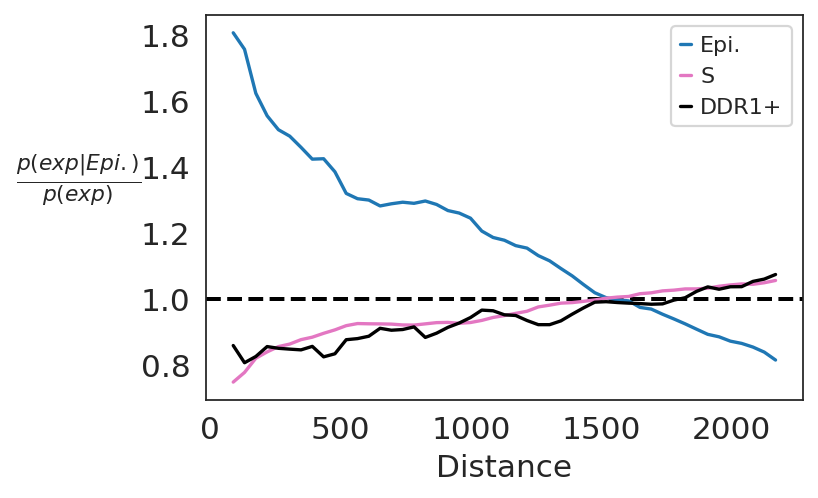

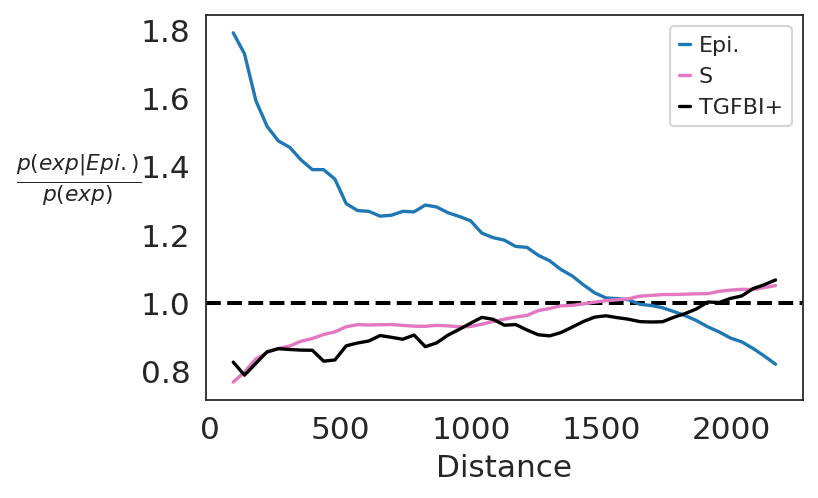

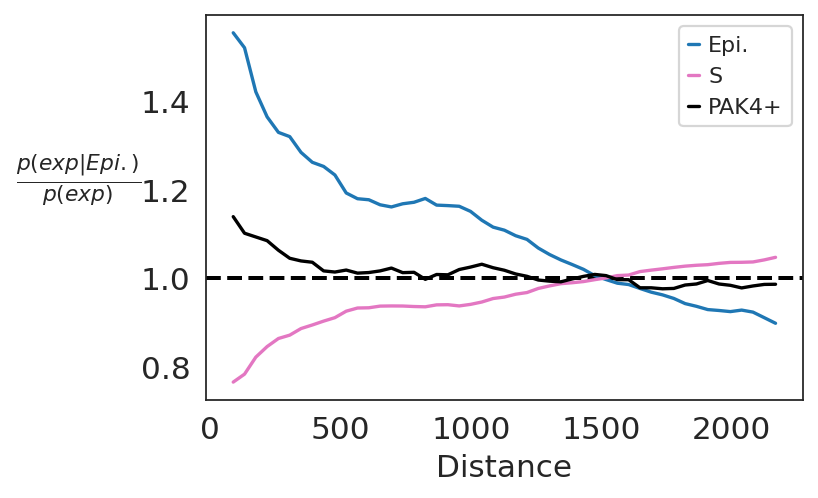

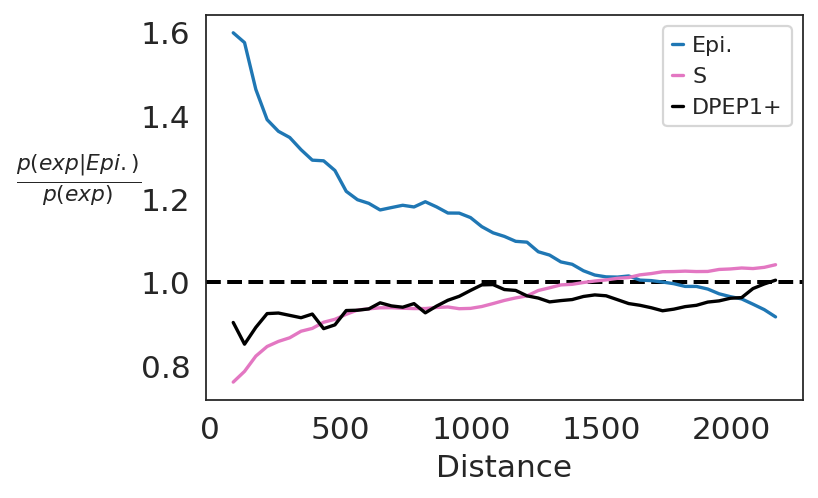

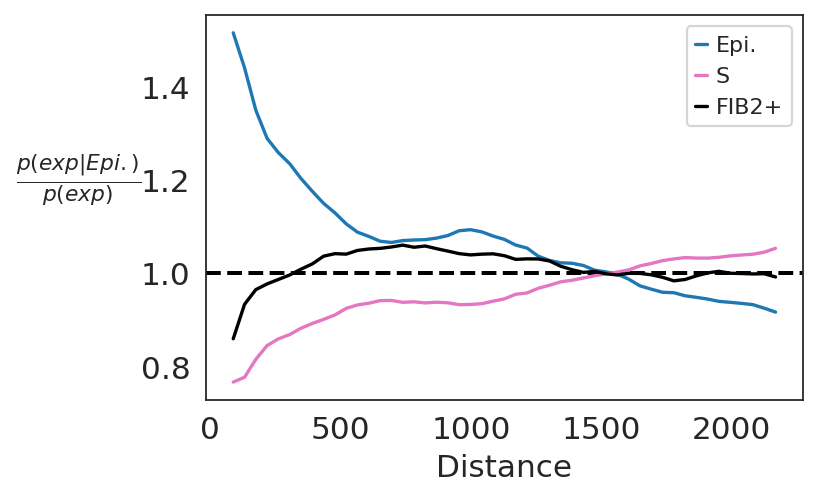

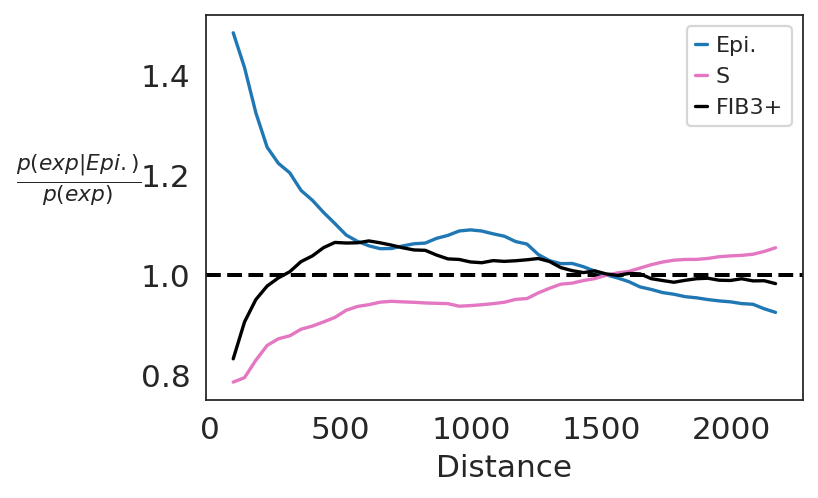

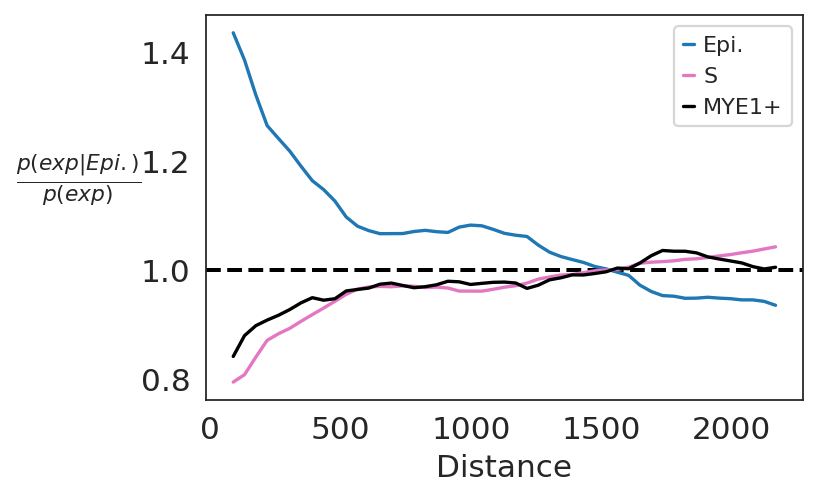

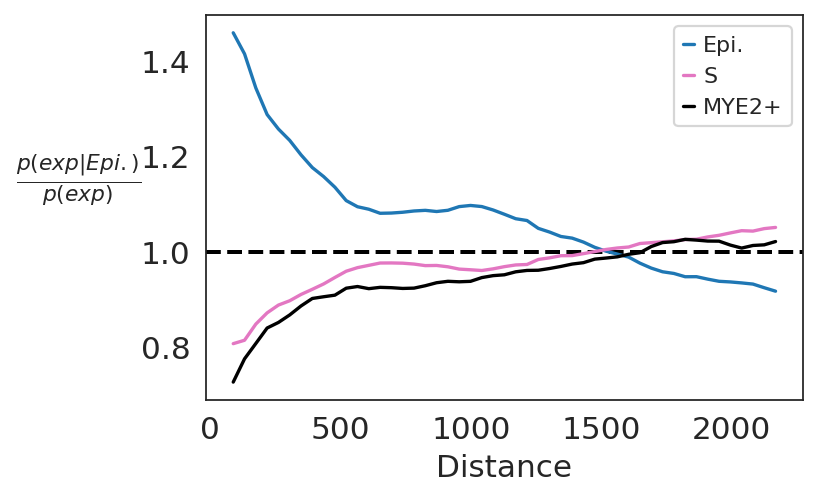

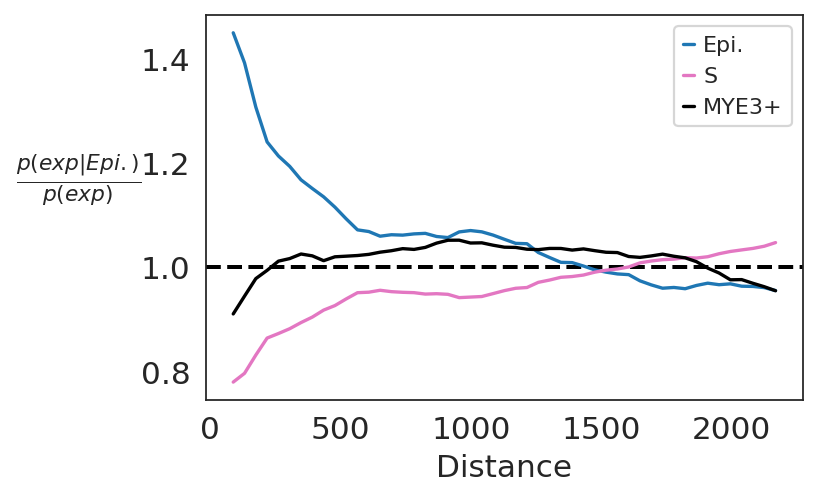

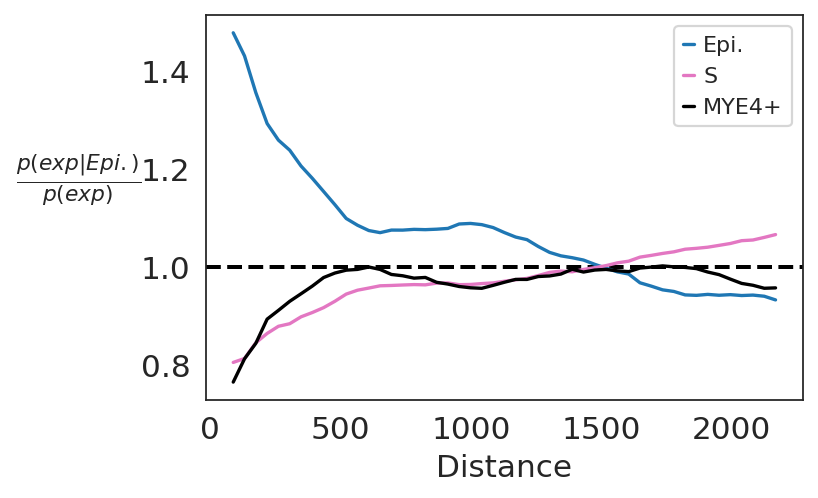

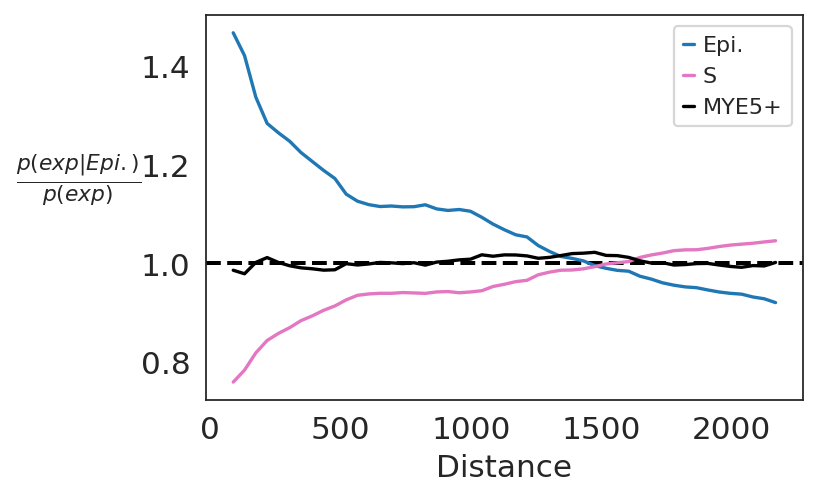

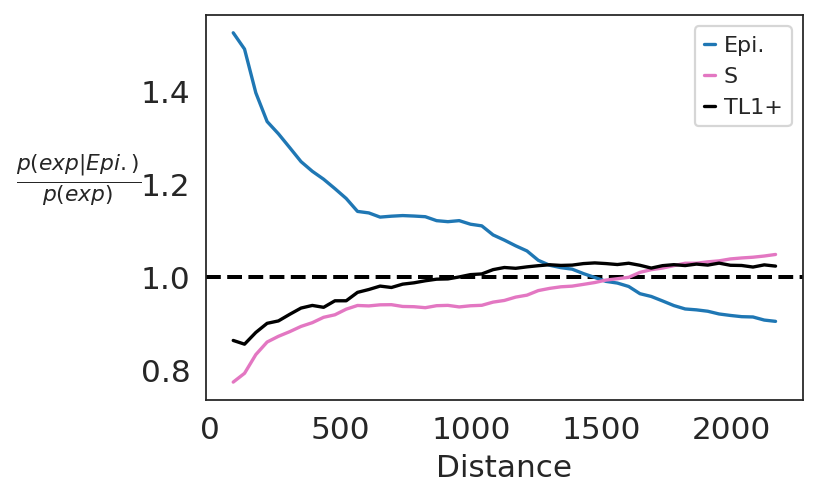

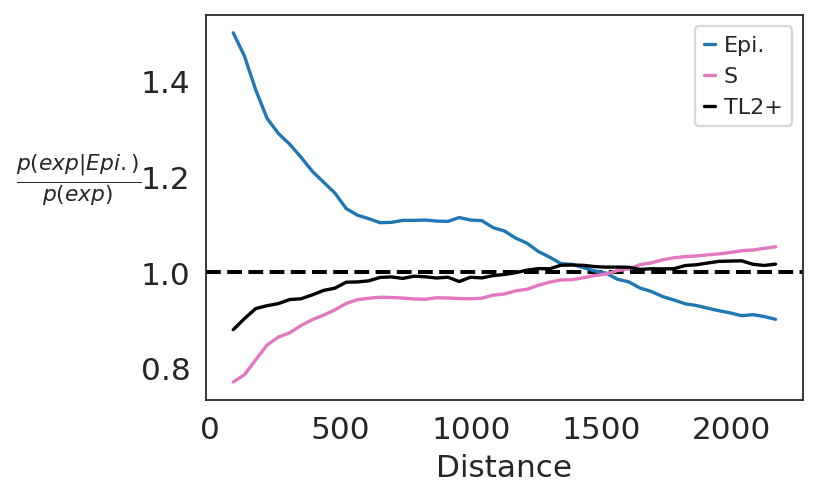

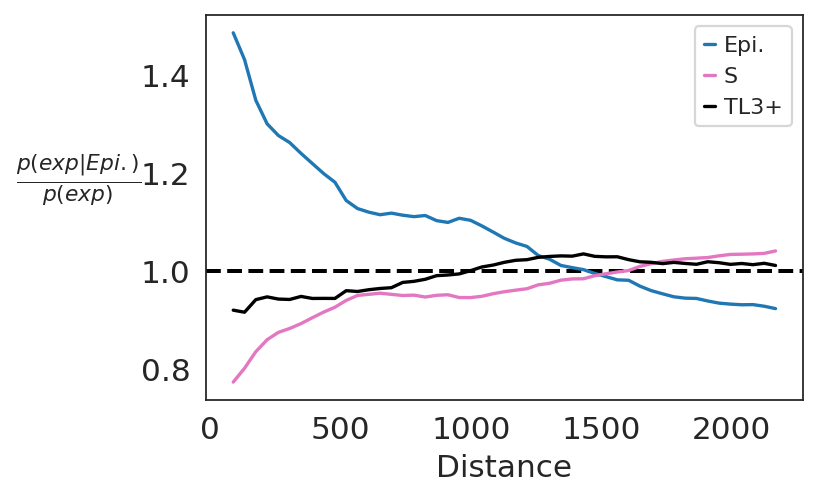

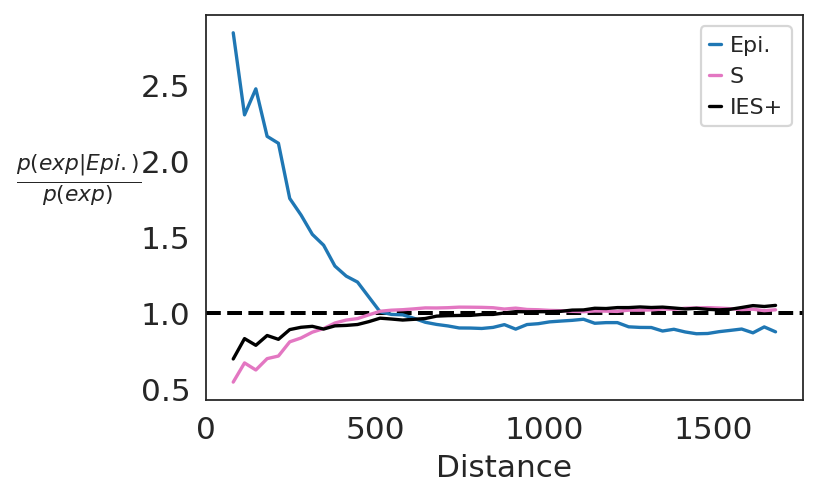

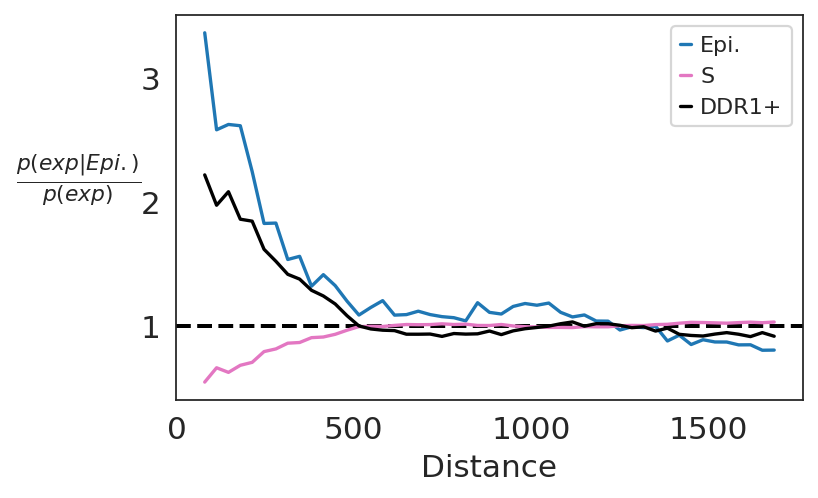

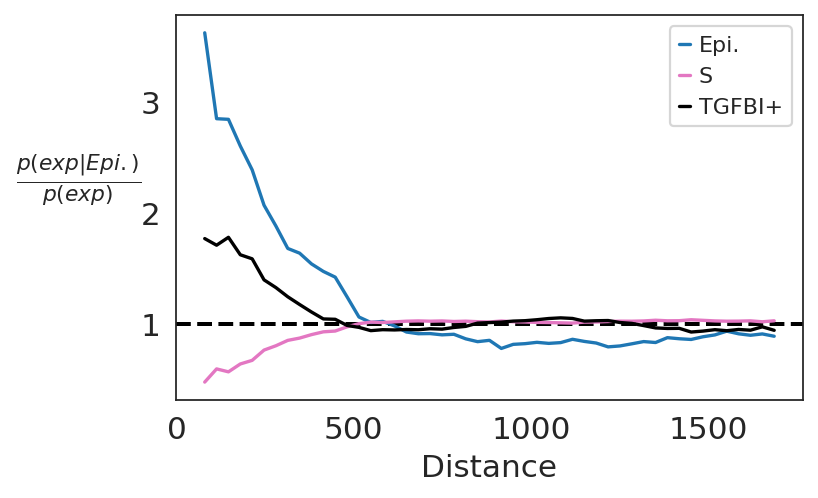

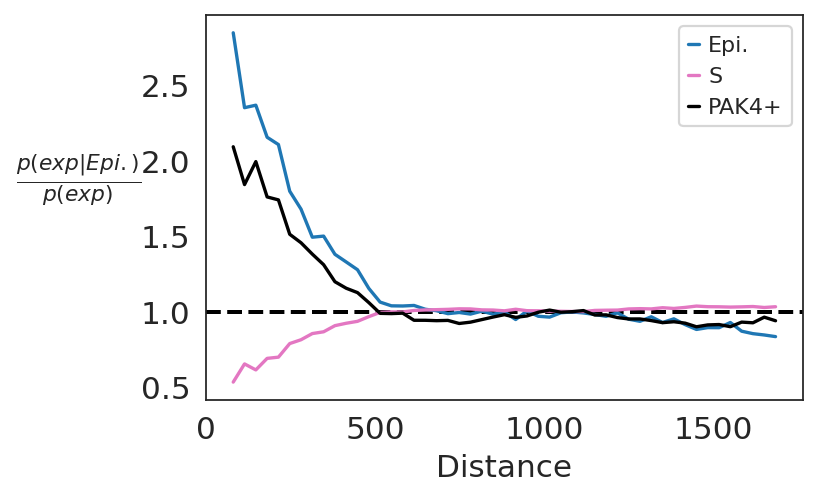

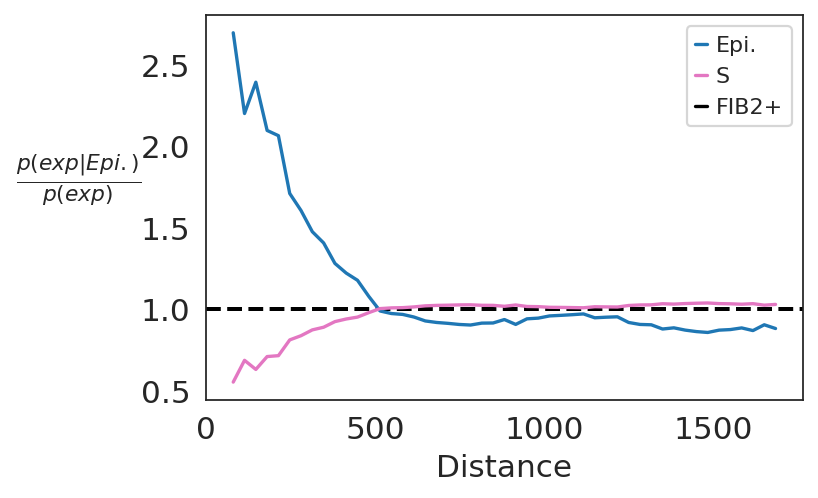

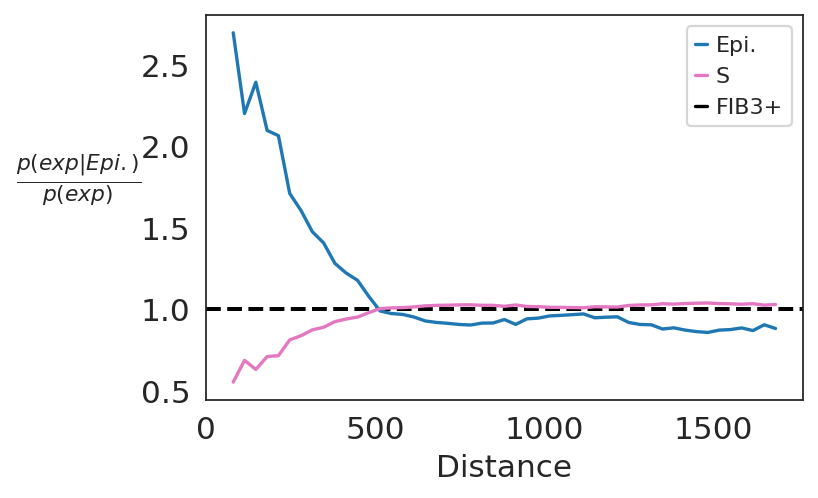

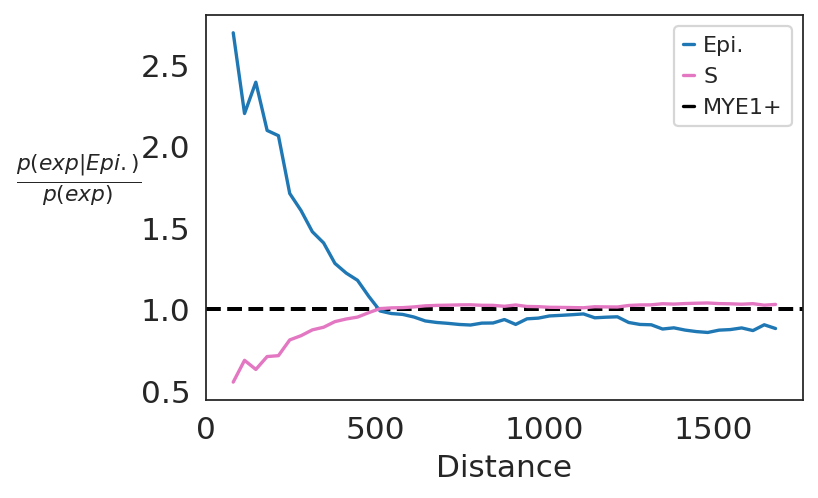

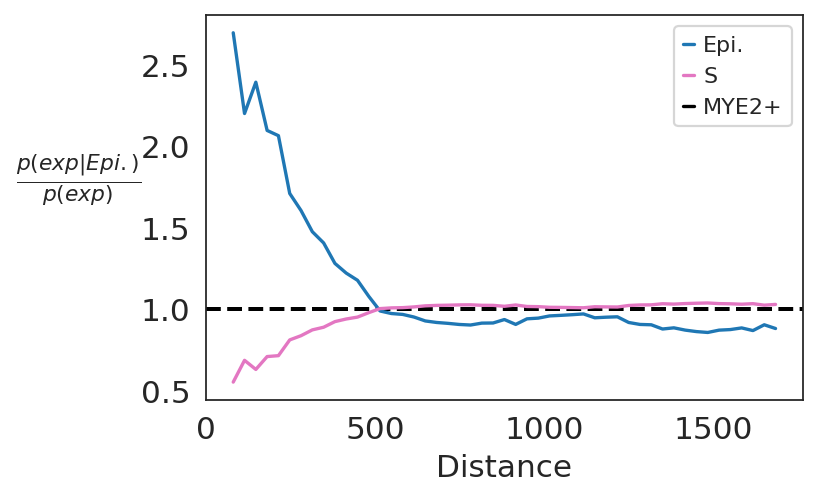

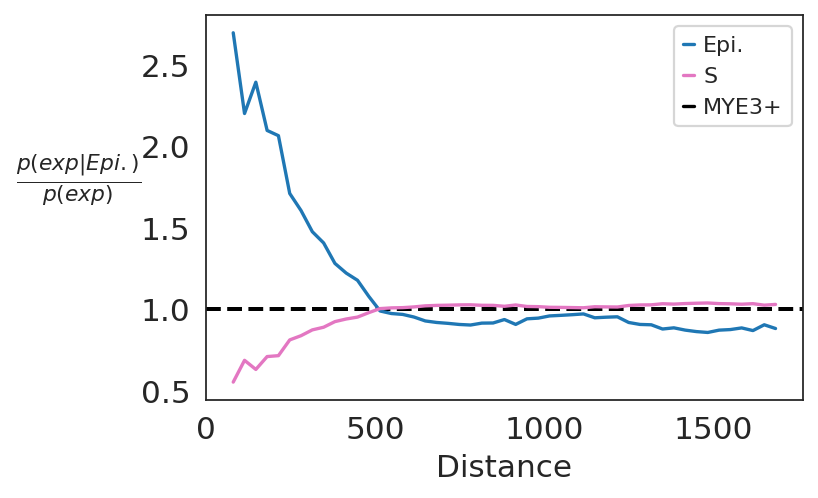

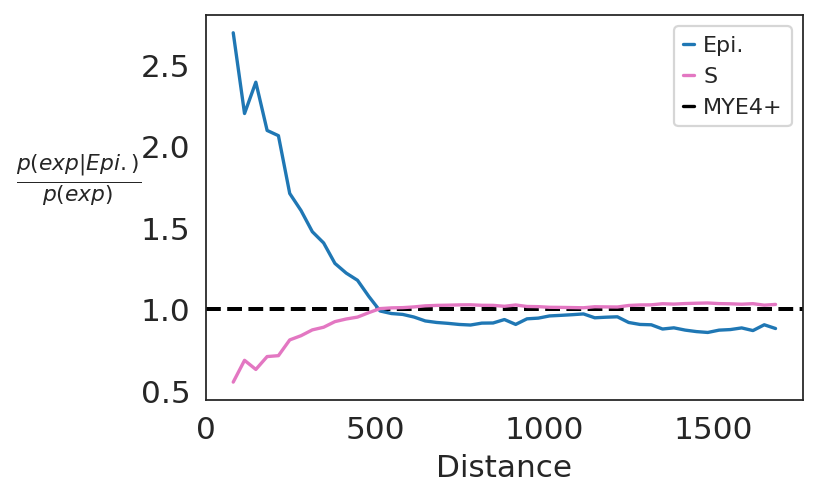

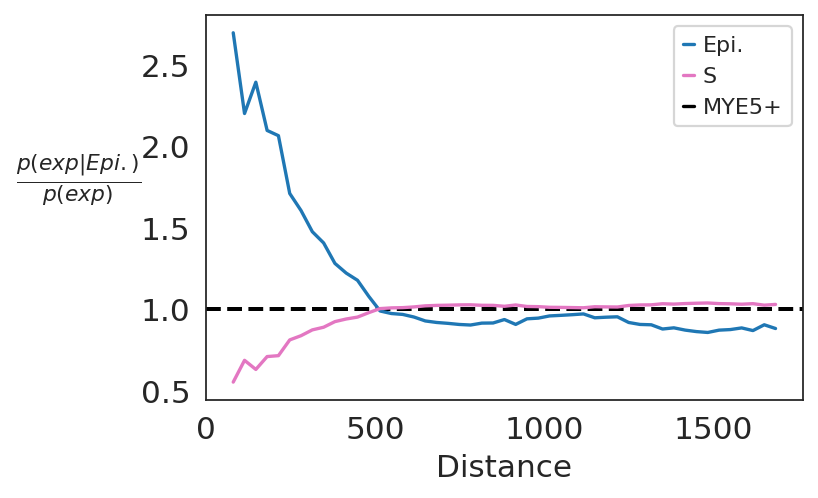

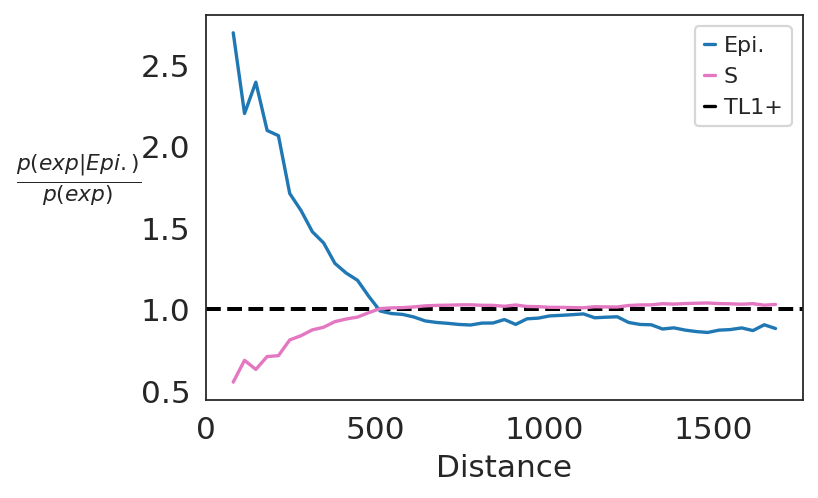

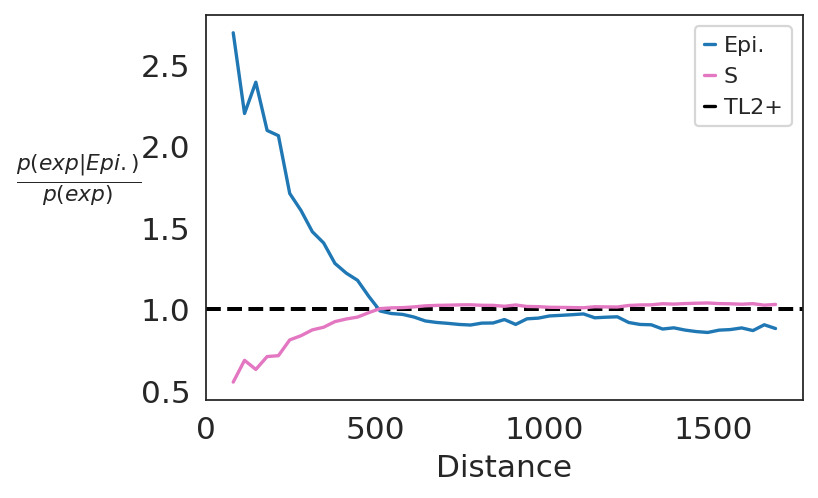

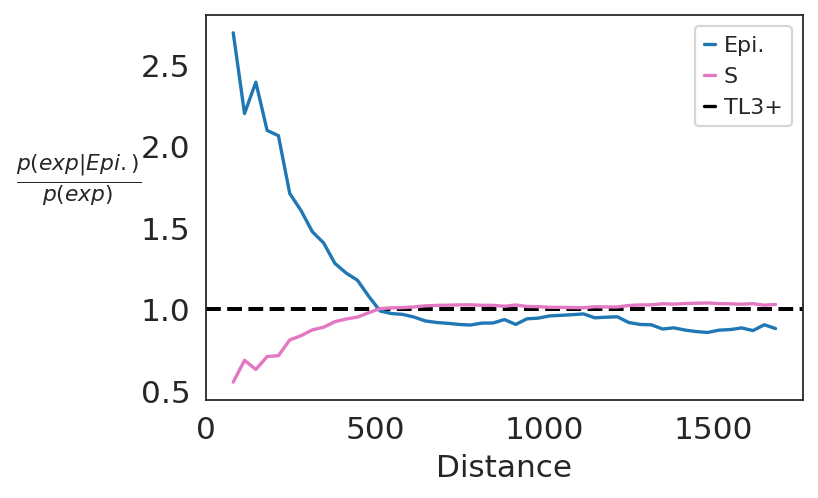

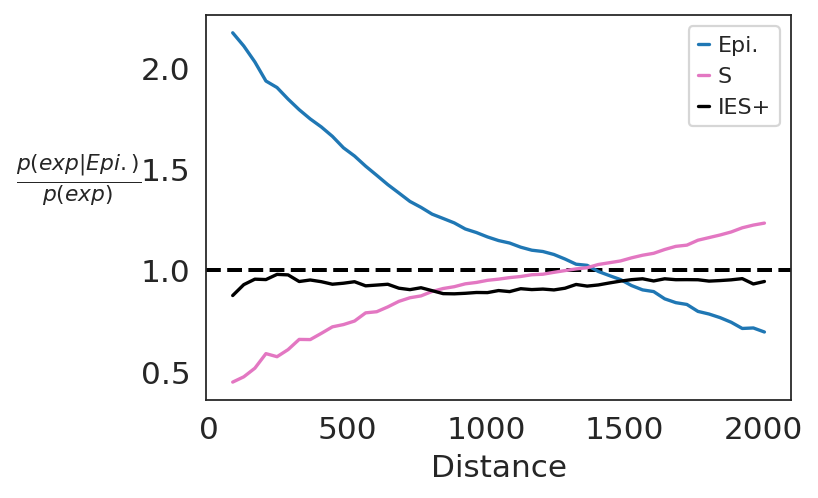

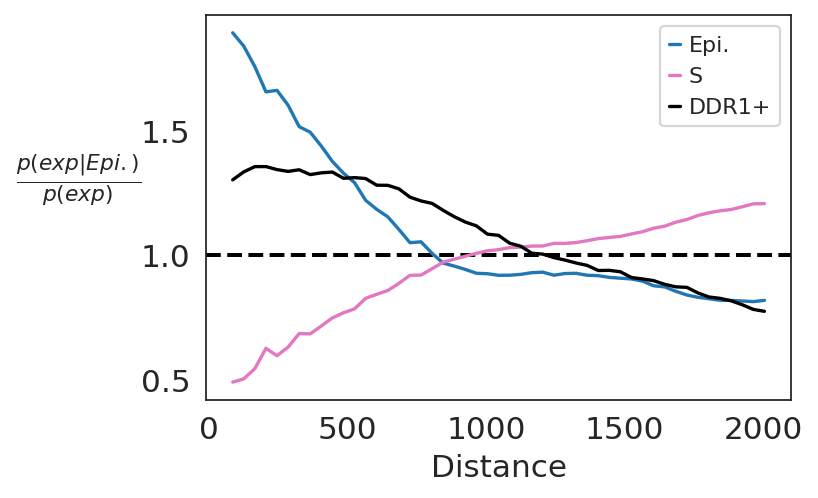

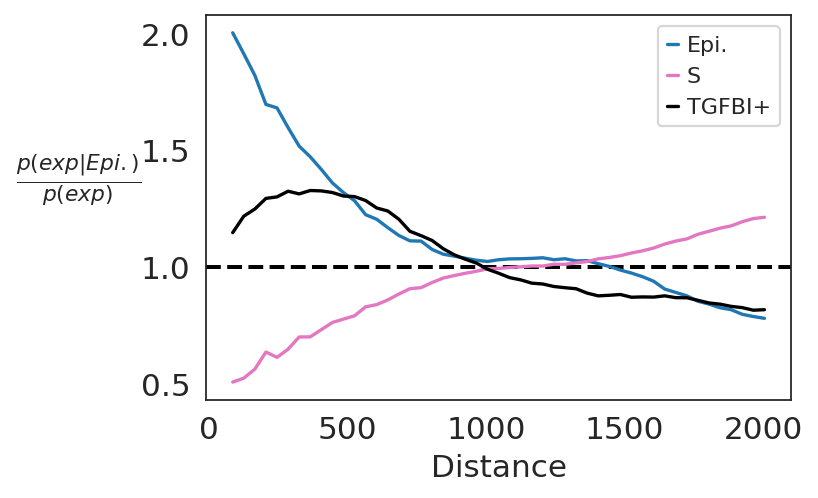

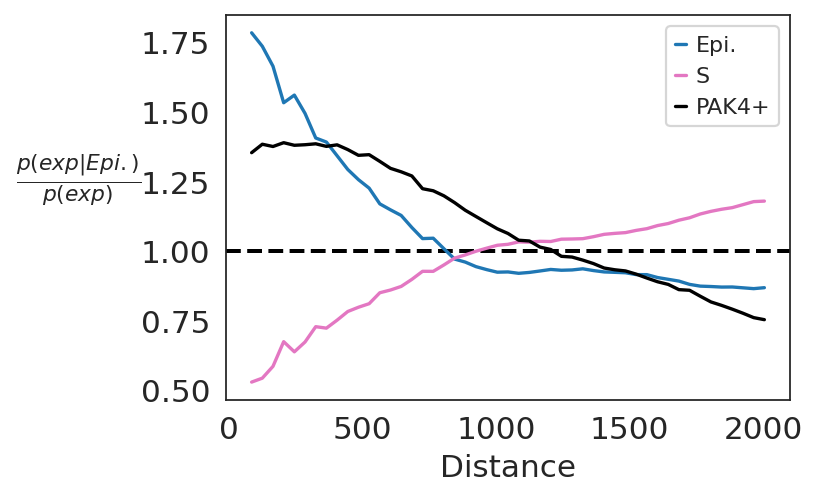

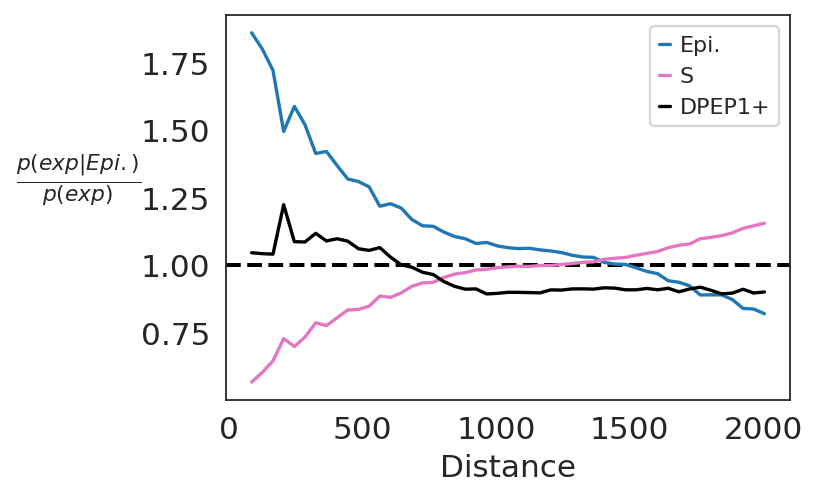

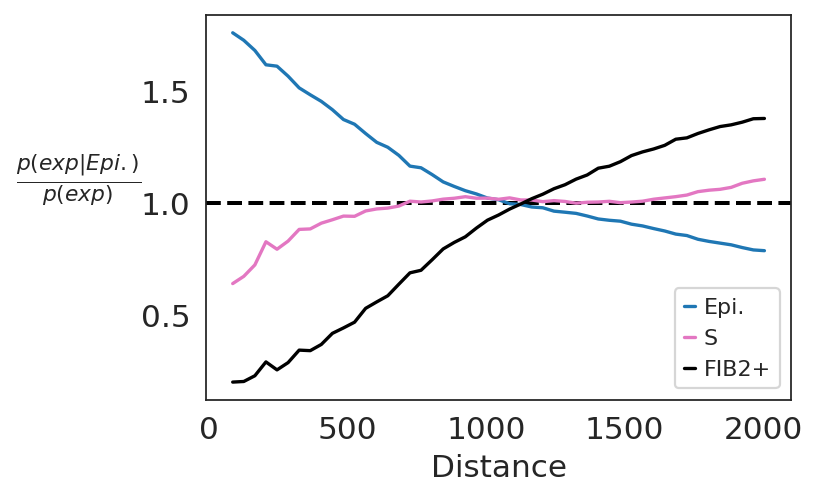

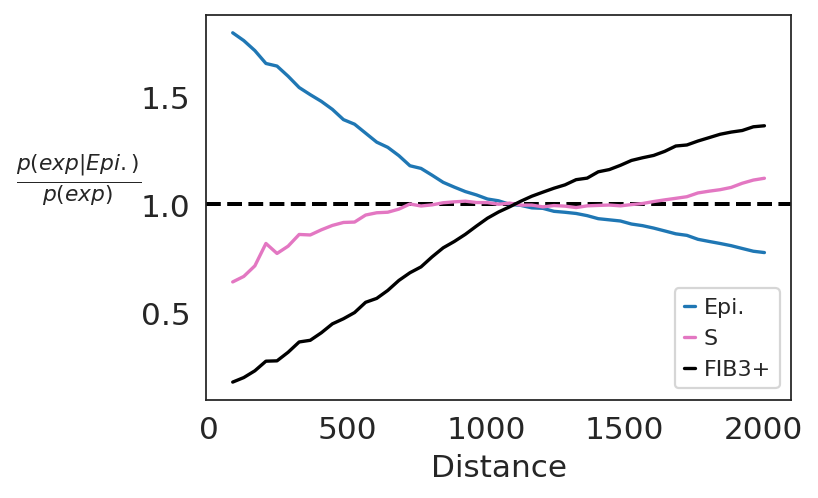

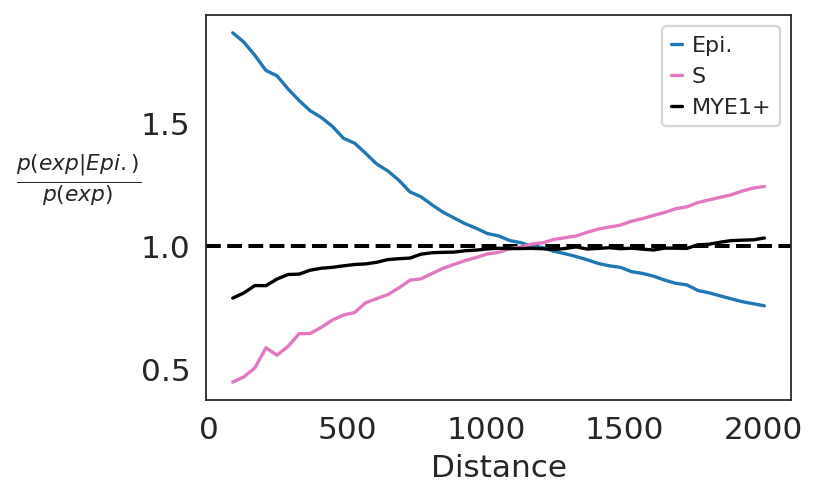

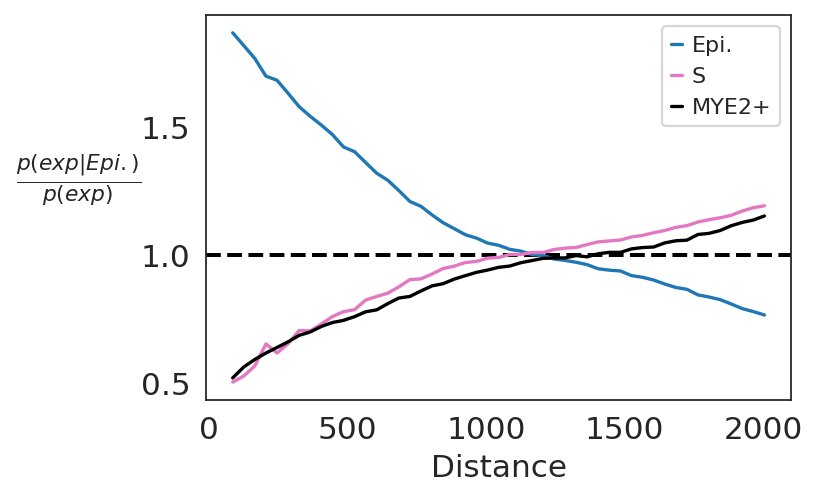

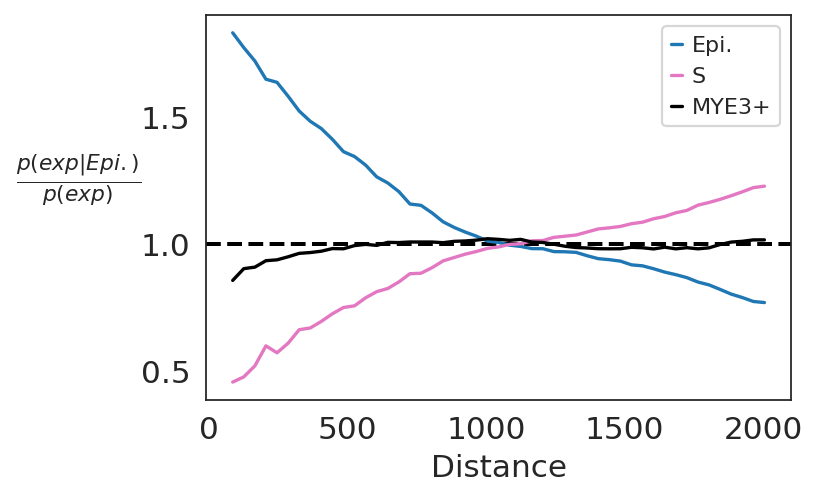

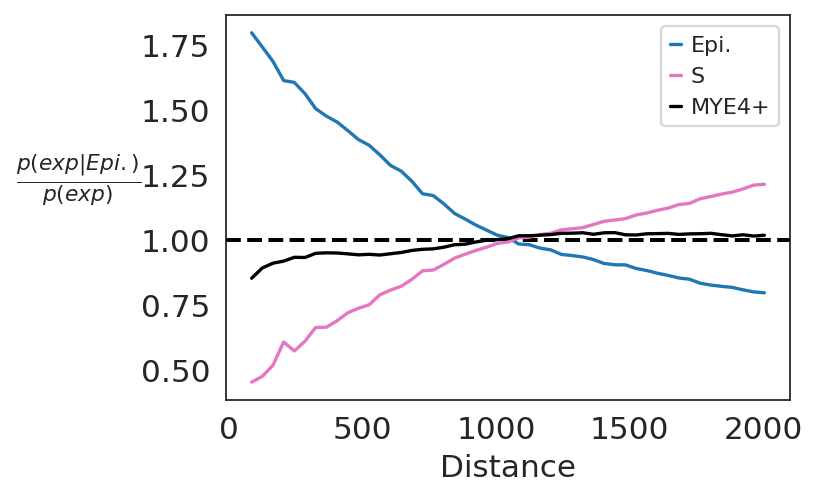

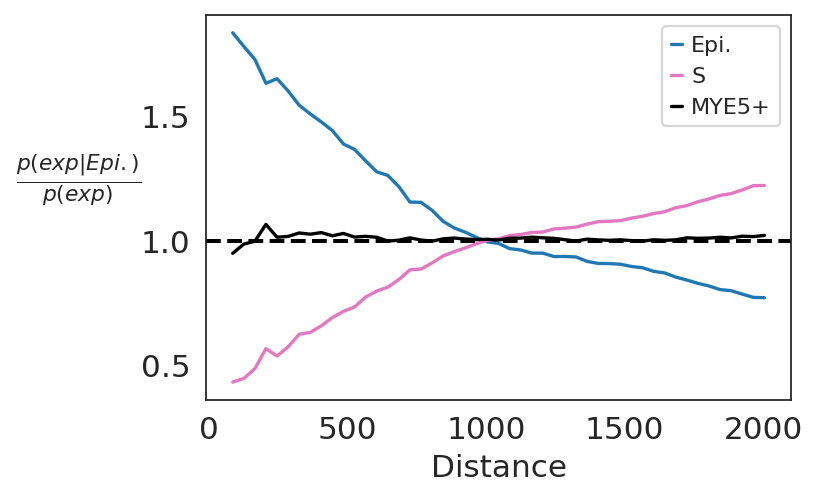

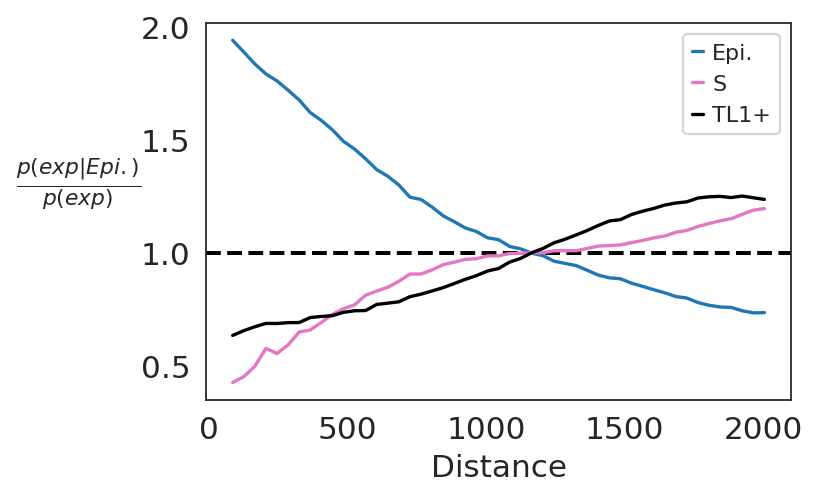

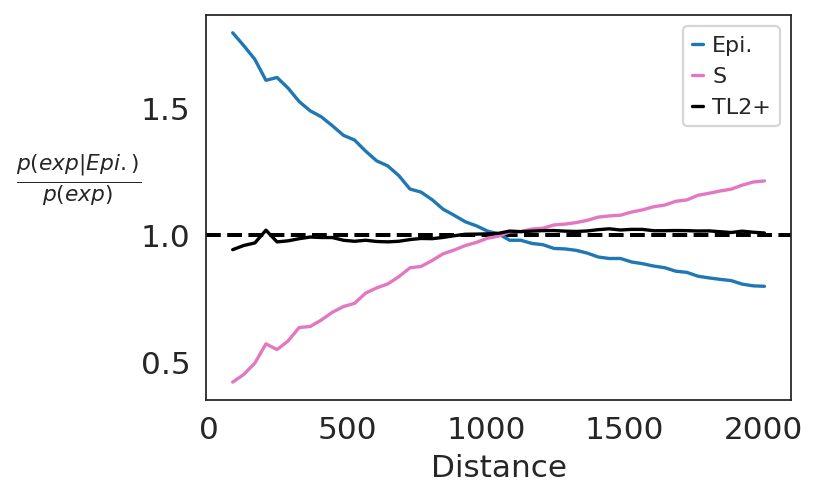

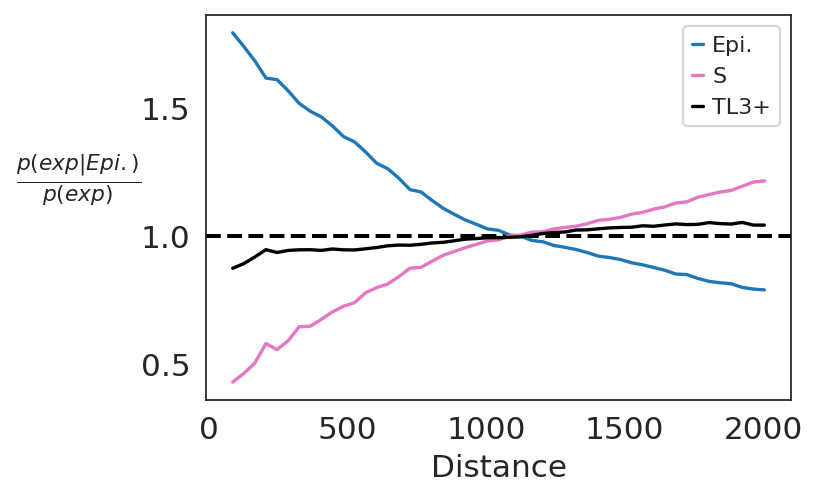

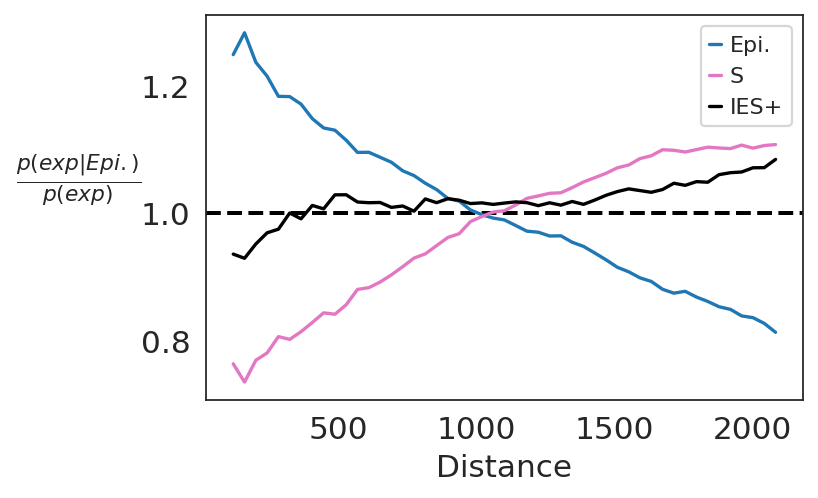

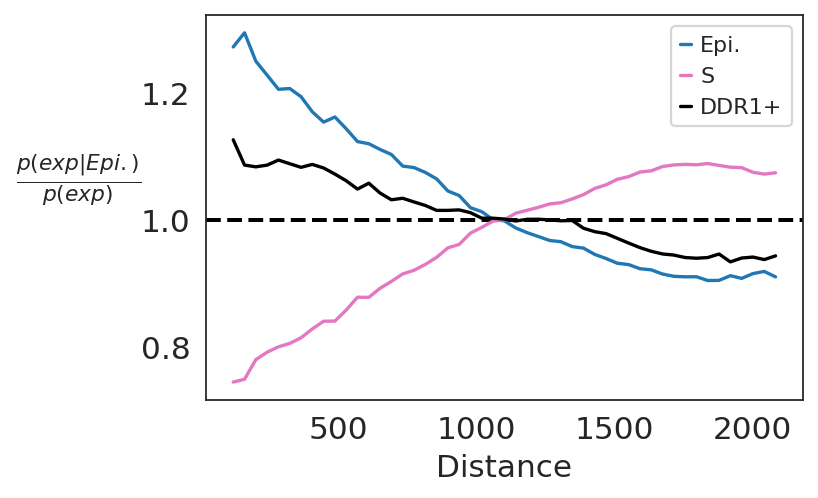

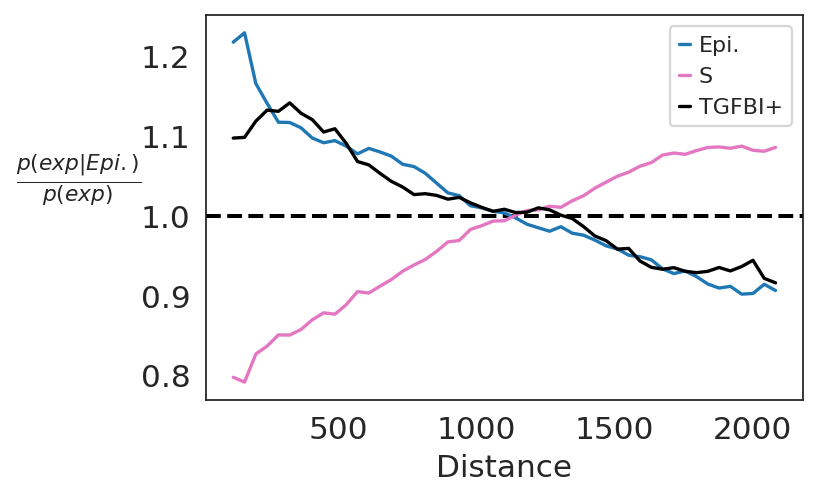

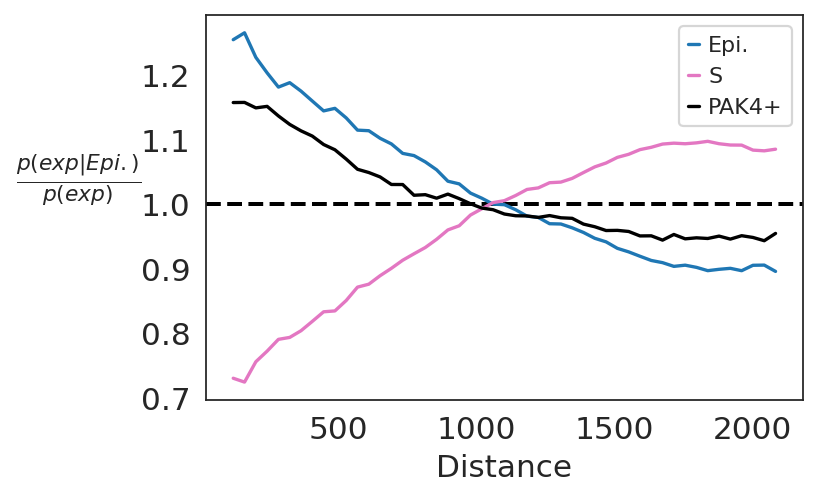

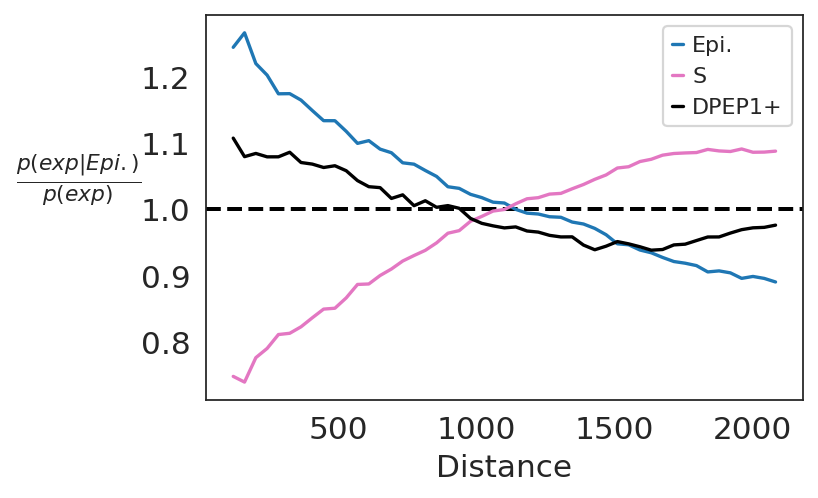

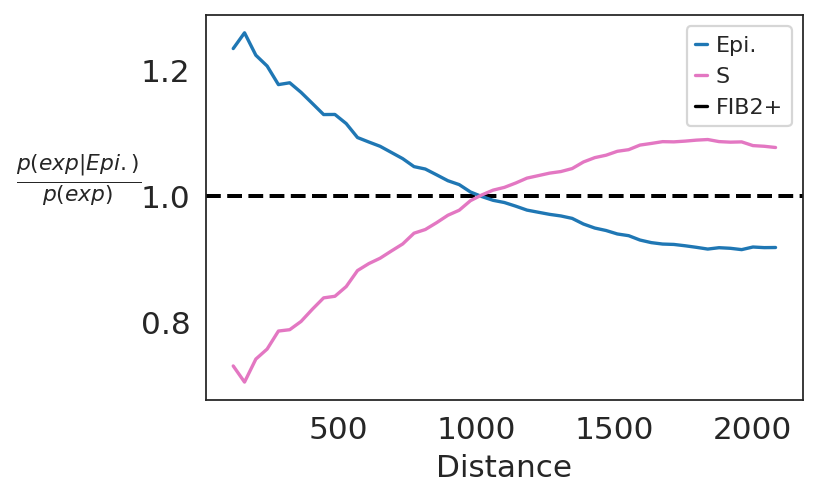

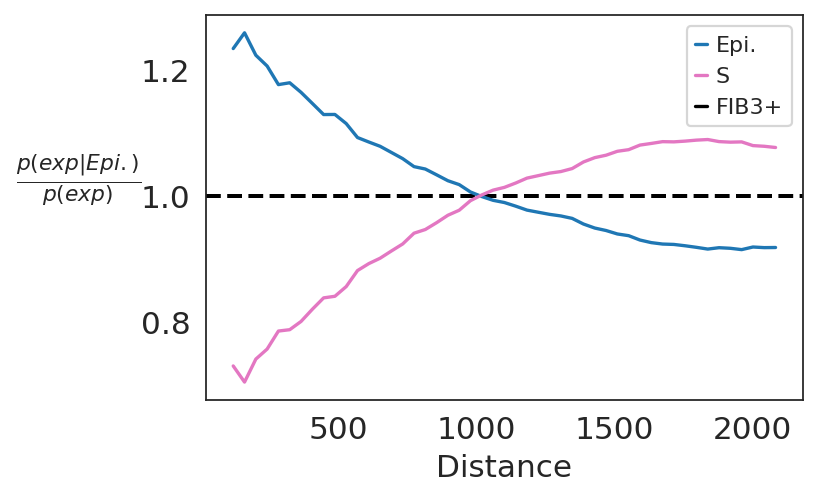

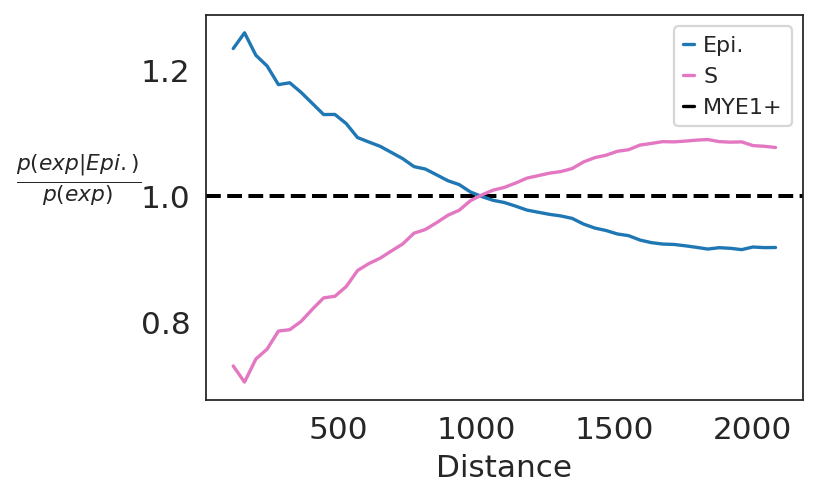

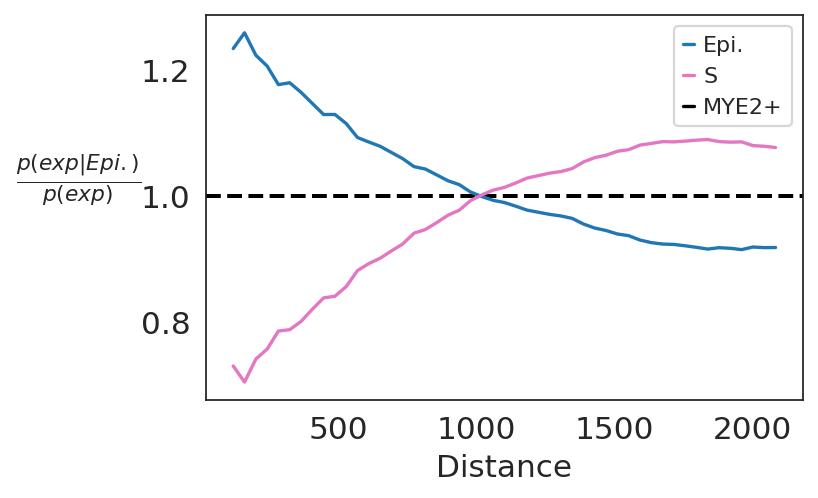

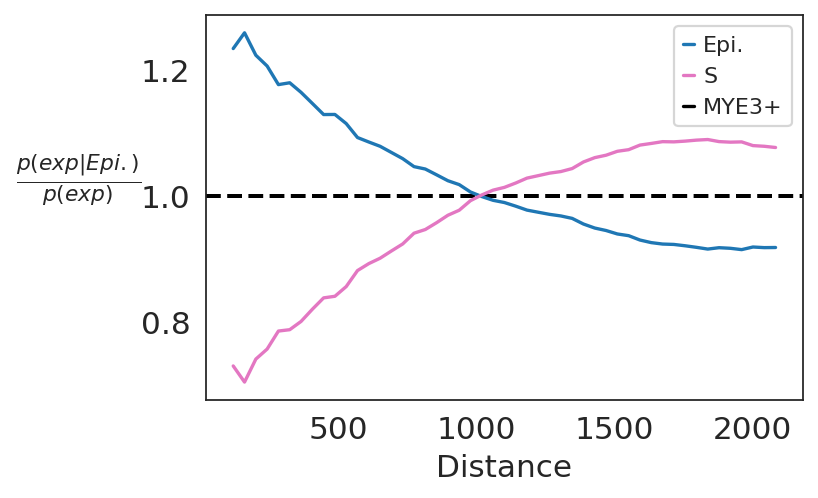

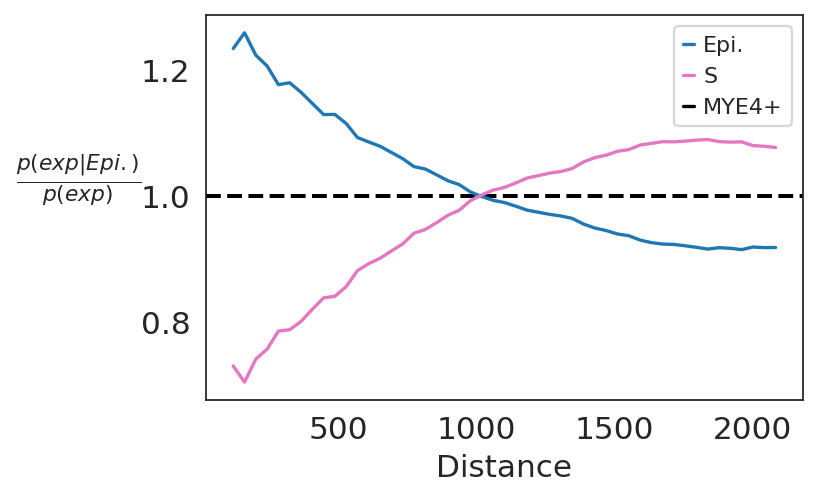

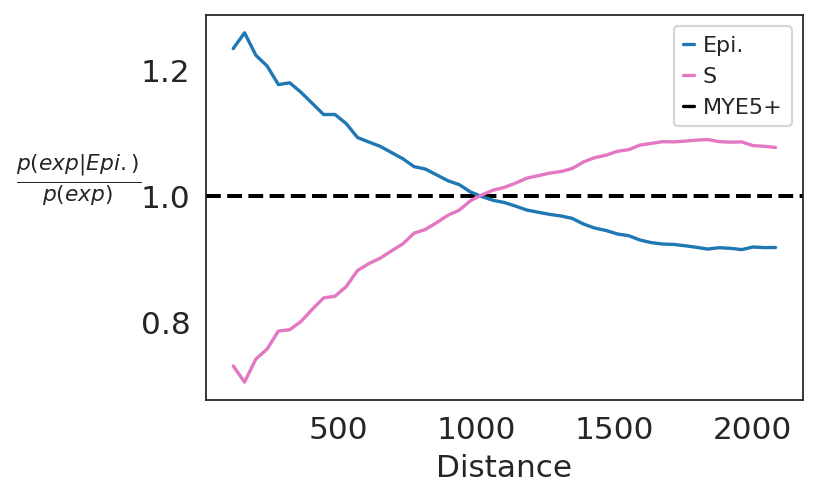

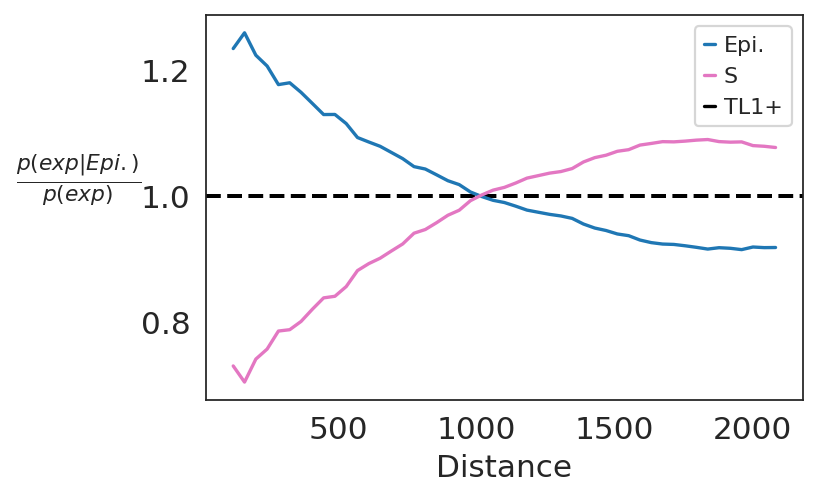

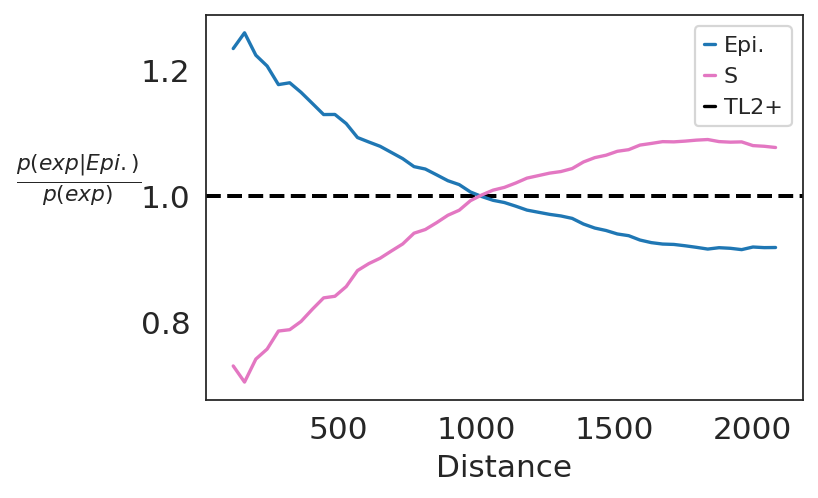

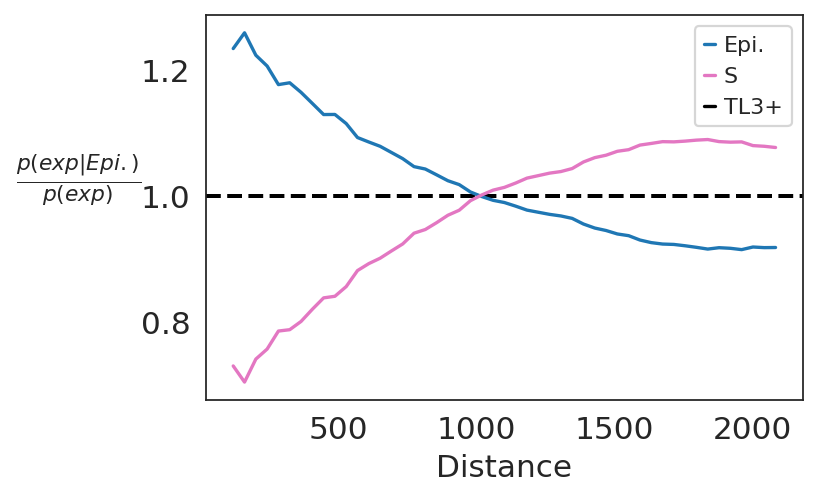

In [6]:
for pat in ["SG00001","SG00002","SG00003","SG00004"]:#sample_key.patient_name.unique():
    print("\nStarting {}".format(pat))
    sample_key_tmp = sample_key.loc[sample_key.patient_name == pat,:].copy()
    
    # check for vTMA sample first
    if any(sample_key_tmp.TMA=="T"):
        # identify index of TMA sample
        sample_key_tma = sample_key_tmp.loc[sample_key_tmp.TMA=="T",:].index
        assert len(sample_key_tma)==1, "Should only be one TMA per sample..."
        print("Detected vTMA sample: {}".format(sample_key_tma[0]))
        a_ws = sc.read("datasets/{}_master.h5ad".format(sample_key_tma[0]))
        a_ws.obs.rename(columns=rename_dict, inplace=True)
        block = sample_key.loc[sample_key_tma[0], "block_name"]
        # perform analyses
        immune_excl_cooccurrence(a_ws, pat, block, markers_thresh_dict, TMA_dist=sample_key.loc[sample_key_tma[0], "cooccurrence_dist"], percentiles=True)
        # remove TMA sample and move on
        sample_key_tmp = sample_key_tmp.loc[sample_key_tmp.TMA=="F",:].copy()
    
    # check for whole-slide sample next
    if any(sample_key_tmp.ws_adata!=""):
        # identify path to WS sample
        ws_samples = sample_key_tmp.loc[sample_key_tmp.ws_adata!="", "ws_adata"].unique()
        for ws_sample in ws_samples:
            sample_key_ws = sample_key_tmp.loc[sample_key_tmp.ws_adata==ws_sample, "ws_adata"]
            print("Detected {} whole-slide sample(s) saved in {}".format(len(sample_key_ws), sample_key_ws[0]))
            a_ws = sc.read(sample_key_ws[0])
            a_ws.obs.rename(columns=rename_dict, inplace=True)
            block = sample_key.loc[sample_key.ws_adata == sample_key_ws[0], "block_name"]
            if len(block) > 0:
                block = block[0]
            # perform analyses
            immune_excl_cooccurrence(a_ws, pat, block, markers_thresh_dict, percentiles=True)
        # remove whole-slide sample and move on
        sample_key_tmp = sample_key_tmp.loc[sample_key_tmp.ws_adata=="",:].copy()
        
    # check for "regular" visium samples
    if len(sample_key_tmp) > 0:
        print("Detected {} 'regular' ST samples(s):".format(len(sample_key_tmp)))
        reg_samples = sample_key_tmp.index
        for reg_sample in reg_samples:
            print(reg_sample)
            a_ws = sc.read("datasets/{}_master.h5ad".format(reg_sample))
            a_ws.obs.rename(columns=rename_dict, inplace=True)
            block = sample_key.loc[reg_sample, "block_name"]
            # perform analyses
            immune_excl_cooccurrence(a_ws, pat, block, markers_thresh_dict, percentiles=True)
    else:
        print("No 'regular' ST samples for {}".format(pat))
        
    print("DONE.\n")